In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  

In [19]:
train = pd.read_hdf('data/property.train.h5')
train.head()

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,...,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
0,"[Москва, МЦК Лужники]","[23 февраля 2018, 133, (+2 за сегодня), Обновл...","[г. Москва, г. Москва]",[],380.610000,"secure Parking, video surveillance, 24-hour se...",Brick,apartments,new building,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[сегодня в 04:52, 3, (+3 за сегодня)]","[Новая Москва, п. Сосенское, п. Коммунарка, Юж...",[],8.004631,Yes,Monolithic-brick,flat,from the developer,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Москва, МЦК Крымская, ул. Поляны]","[5 марта, 6, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, ул Поляны, г. Москва, ул Поляны]",[],6.520000,provided,Monolithic,apartments,from the developer,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Москва, Беговой, м. Динамо, МЦК Хорошёво]","[22 мая 2018, 60, (+2 за сегодня), Обновлено 1...","[г. Москва, Беговой, г. Москва, Беговой]",[],20.269686,NaN,Monolithic,flat,new building,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Москва, Филёвский Парк, м. Фили, МЦК Шелепиха]","[26 декабря 2018, 13, (+1 за сегодня), Обновле...","[г. Москва, Филёвский Парк, г. Москва, Филёвск...",[],15.100880,NaN,Monolithic,apartments,secondary,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45694 entries, 0 to 45693
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   breadcrumbs                 45694 non-null  object 
 1   date                        45694 non-null  object 
 2   geo_block                   45694 non-null  object 
 3   owner                       45694 non-null  object 
 4   price                       45694 non-null  float64
 5   Security:                   45694 non-null  object 
 6   Building type:              45694 non-null  object 
 7   Object type:                45694 non-null  object 
 8   Ad type:                    45694 non-null  object 
 9   Commission agent:           45694 non-null  object 
 10  Construction phase:         45694 non-null  object 
 11  Housing class:              45694 non-null  object 
 12  Elevator:                   45694 non-null  object 
 13  Bathroom type:              456

In [3]:
for col in train.columns[4:]:
    print(col)
    print(train[col].unique())

price
[380.61       8.004631   6.52     ...  16.4069     7.89624   16.92    ]
Security:
['secure Parking, video surveillance, 24-hour security, access system, Concierge'
 'Yes' 'provided' nan
 'round the clock security, video surveillance, barrier, burglar alarm'
 'Fenced guarded territory, Concierge' 'closed area'
 'video surveillance, Concierge service 24/7, access control'
 'closed area, Concierge, video surveillance, access system'
 'fenced area, access control system, video surveillance'
 'protected area, video surveillance' 'closed area, Concierge'
 'Fenced, well guarded by security cameras around the perimeter, the area with landscaping and the use of small architectural forms, high-quality and safe playgrounds.'
 'round the clock security, Concierge, intercom, video surveillance, barrier'
 'private protected area' 'Protected, fenced area' 'video surveillance'
 'professional round-the-clock security, checkpoint'
 'video surveillance, multi-level security system, Concierge'
 'Pro

Building type:
Object type:
Ad type:
Commission agent:
Construction phase:
Housing class:
Elevator:
Bathroom type:
Balcony type:
Mortgage possible:
The view from the window:
Garbage chute:
Repair:
Fridge:
Phone:
Furniture:
Free layout:
It is possible to bargain:
Floor covering:
Room type:
Internet:
<ipython-input-20-1ed7be792ece>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12,3))
Kitchen furniture:
TV:
Washing machine:
Foundation type:
Overlap type:
Type of the building:
Playground:
Class:


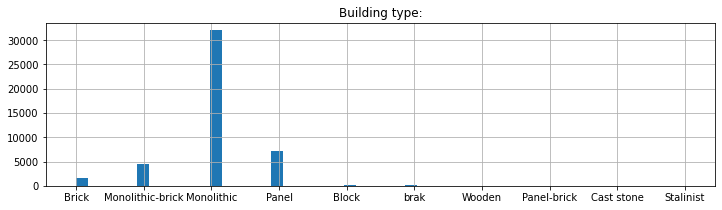

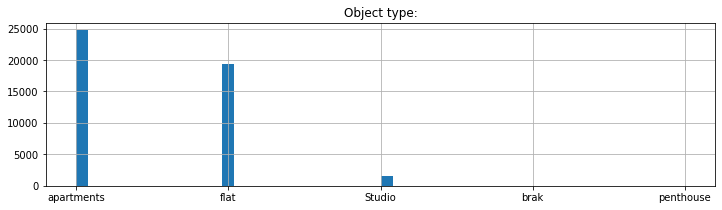

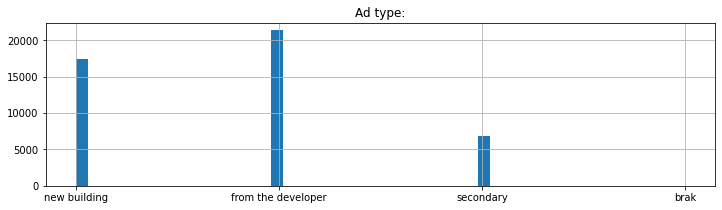

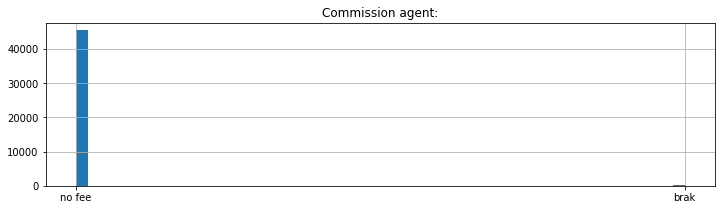

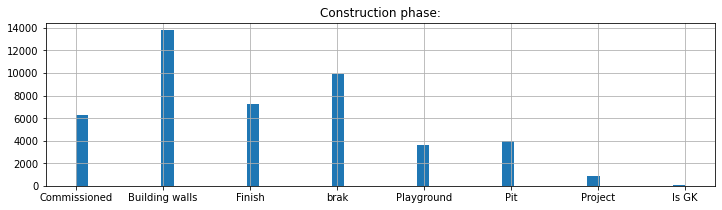

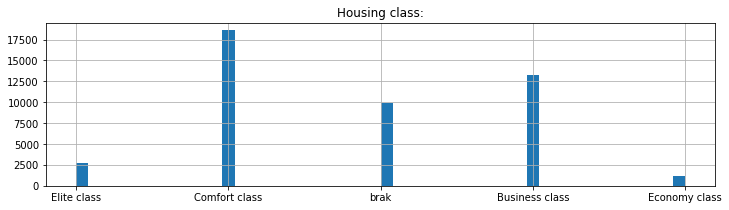

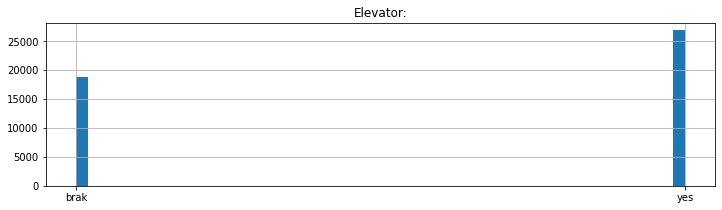

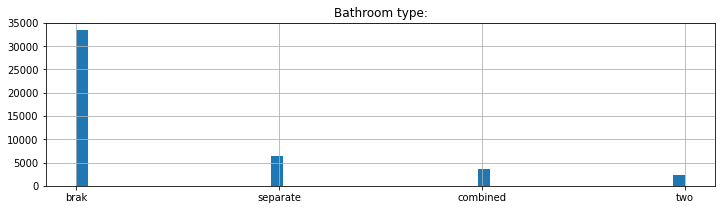

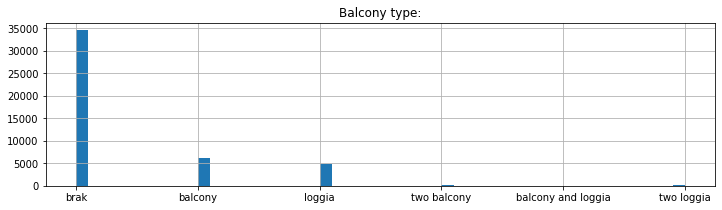

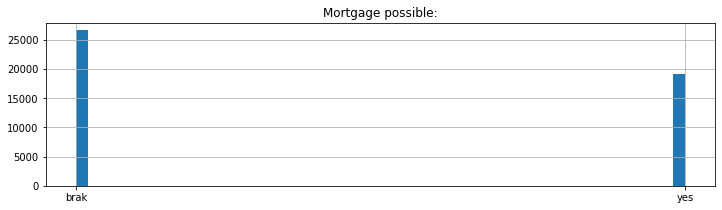

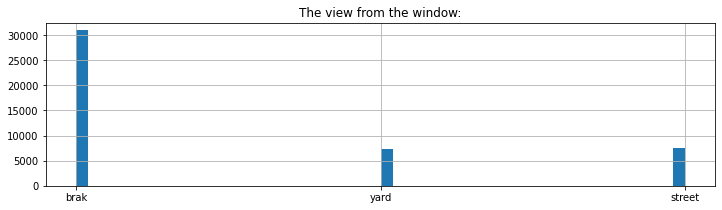

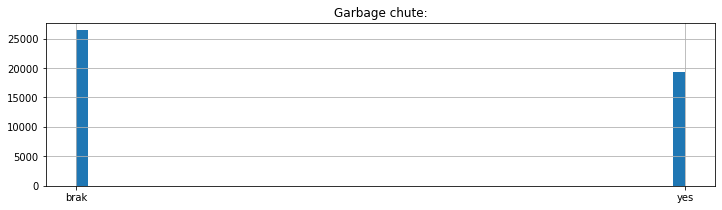

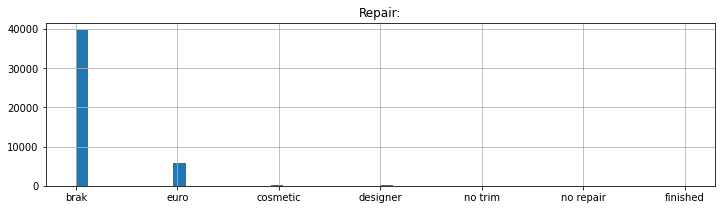

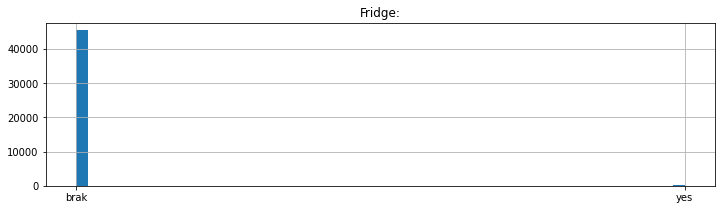

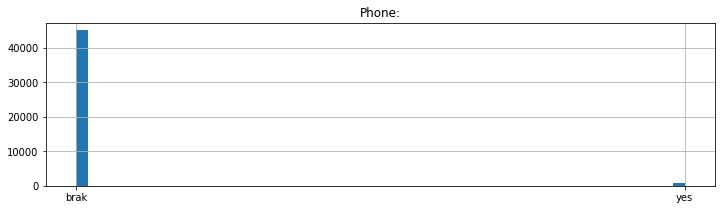

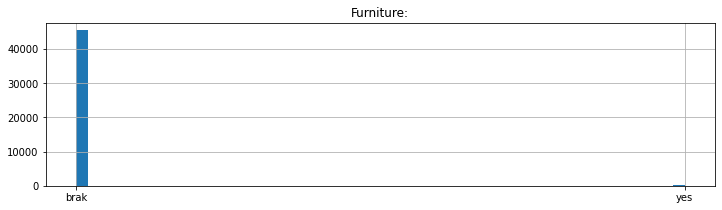

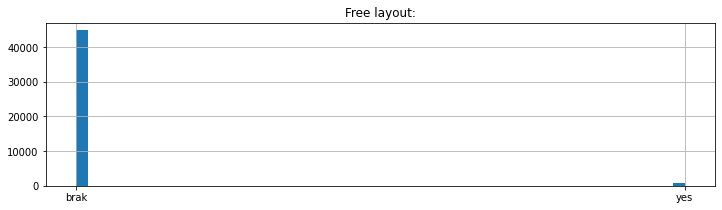

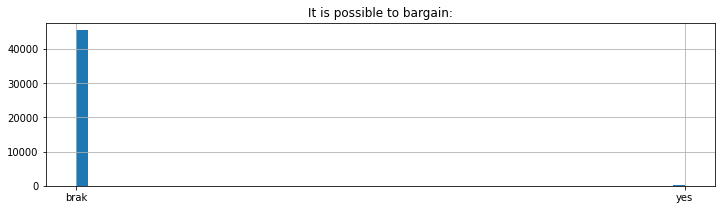

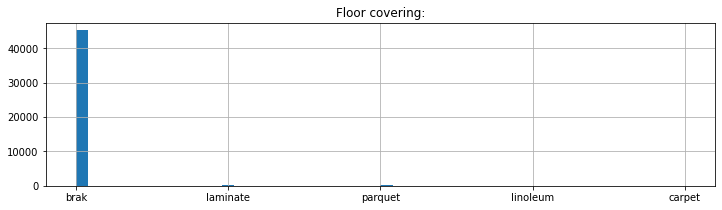

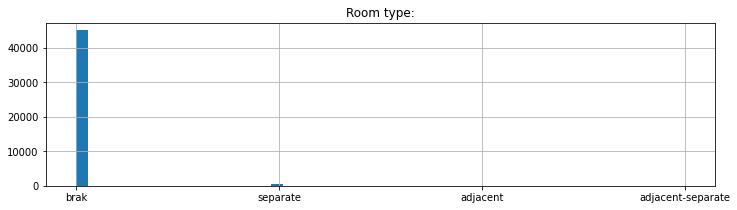

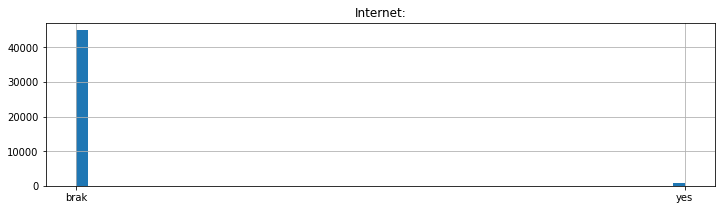

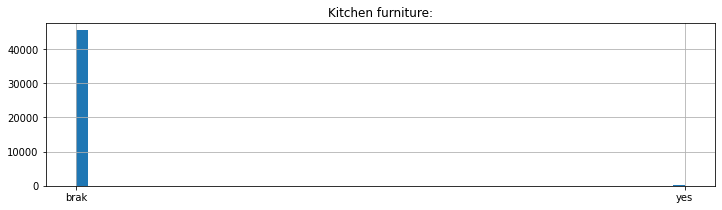

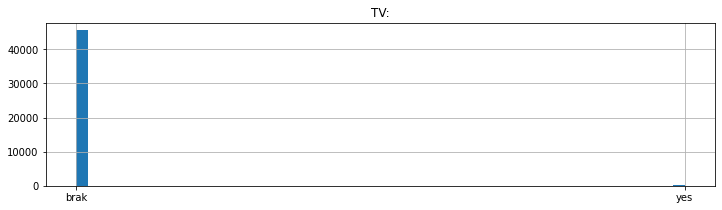

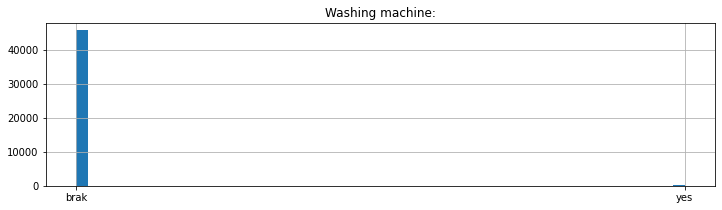

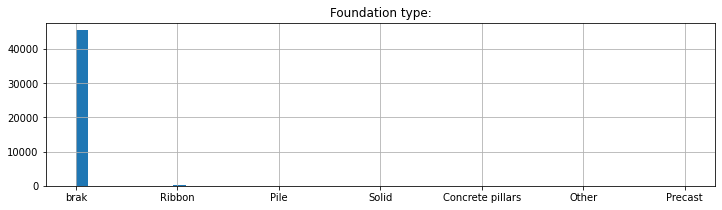

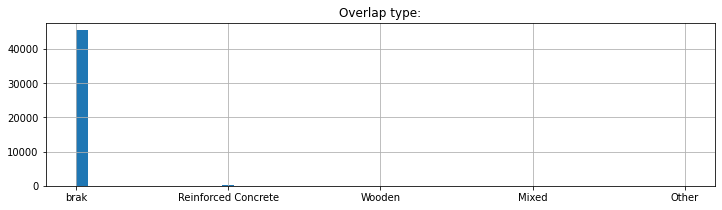

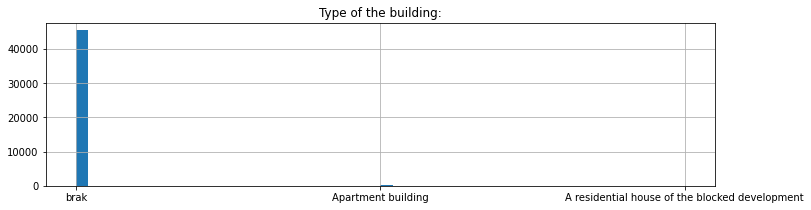

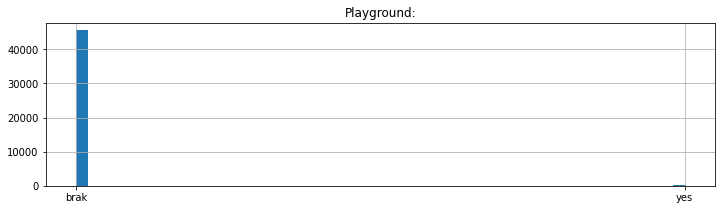

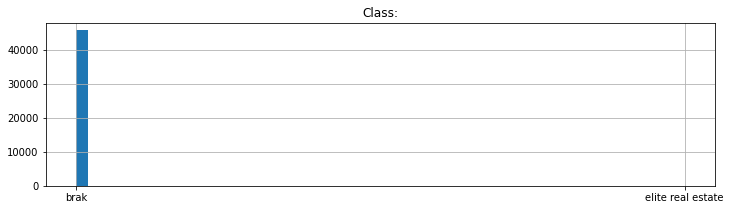

In [20]:
train.fillna(value = 'brak', inplace = True)
for col in train.columns[6:]: 
    print(col)
    train[col] = train[col].astype("category")
    fig, ax = plt.subplots(figsize=(12,3))
    train[col].hist(bins =50)
    plt.title(col)

In [23]:
column_to_drop = ['owner','Repair:','Fridge:','Phone:','Furniture:','Free layout:','It is possible to bargain:','Floor covering:','Room type:','Internet:','Kitchen furniture:','TV:','Washing machine:','Foundation type:','Overlap type:','Type of the building:','Playground:','Class:']

train.drop(column_to_drop, axis=1)

,breadcrumbs,date,geo_block,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:
0,"[Москва, МЦК Лужники]","[23 февраля 2018, 133, (+2 за сегодня), Обновл...","[г. Москва, г. Москва]",380.610000,"secure Parking, video surveillance, 24-hour se...",Brick,apartments,new building,no fee,Commissioned,Elite class,brak,brak,brak,brak,brak,brak
1,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[сегодня в 04:52, 3, (+3 за сегодня)]","[Новая Москва, п. Сосенское, п. Коммунарка, Юж...",8.004631,Yes,Monolithic-brick,flat,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,brak,brak
2,"[Москва, МЦК Крымская, ул. Поляны]","[5 марта, 6, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, ул Поляны, г. Москва, ул Поляны]",6.520000,provided,Monolithic,apartments,from the developer,no fee,Finish,Comfort class,yes,combined,brak,brak,yard,yes
3,"[Москва, Беговой, м. Динамо, МЦК Хорошёво]","[22 мая 2018, 60, (+2 за сегодня), Обновлено 1...","[г. Москва, Беговой, г. Москва, Беговой]",20.269686,brak,Monolithic,flat,new building,no fee,brak,brak,yes,brak,loggia,yes,street,yes
4,"[Москва, Филёвский Парк, м. Фили, МЦК Шелепиха]","[26 декабря 2018, 13, (+1 за сегодня), Обновле...","[г. Москва, Филёвский Парк, г. Москва, Филёвск...",15.100880,brak,Monolithic,apartments,secondary,no fee,brak,brak,brak,brak,brak,brak,brak,brak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45689,"[Москва, Солнцево, м. Говорово, МЦК Лужники]","[12 апреля, 10, (+1 за сегодня), Обновлено 14 ...","[г. Москва, Солнцево, г. Москва, Солнцево]",7.896240,brak,Panel,flat,new building,no fee,Building walls,Comfort class,yes,brak,brak,yes,yard,yes
45690,"[Москва, МЦК Кутузовская]","[13 апреля, 10, (+1 за сегодня), Обновлено 17 ...","[г. Москва, г. Москва]",16.920000,provided,Monolithic,apartments,from the developer,no fee,Building walls,Business class,yes,two,brak,brak,yard,brak
45691,"[Москва, Новогиреево, м. Новокосино, МЦК Нижег...","[4 ноября 2018, 86, (+1 за сегодня), Обновлено...","[г. Москва, Новогиреево, г. Москва, Новогиреево]",2.800000,brak,Panel,Studio,secondary,no fee,brak,brak,brak,brak,brak,brak,brak,brak
45692,"[Москва, МЦК Бульвар Рокоссовского]","[3 апреля, 9, (+1 за сегодня), Обновлено 16 мая]","[г. Москва, г. Москва]",5.740000,brak,Monolithic,apartments,from the developer,no fee,Project,Comfort class,brak,brak,brak,brak,brak,brak
